In [274]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [275]:
# re-size all the images to this
IMAGE_SIZE = [90,90]

train_path = 'G:/Compilation Dataset'
#valid_path = 'Datasets/test'


In [276]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

#inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg=VGG16(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)



In [277]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [278]:
  # useful for getting number of output classes
#import glob2
folders =glob('G:/Compilation Dataset/*')

In [279]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [280]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [281]:
#model.summary()

In [282]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [283]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [235]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('G:/Compilation Dataset',
                                                 target_size = (90,90),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 378 images belonging to 4 classes.


In [236]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  epochs=10,
  steps_per_epoch=len(training_set)
)
model.save('Vgg-compilation')

Epoch 1/10
12/12 [==============================] - 26s 2s/step - loss: 1.0169 - accuracy: 0.7063
Epoch 2/10
12/12 [==============================] - 26s 2s/step - loss: 0.3008 - accuracy: 0.9868
Epoch 3/10
12/12 [==============================] - 26s 2s/step - loss: 0.1248 - accuracy: 0.9947
Epoch 4/10
12/12 [==============================] - 26s 2s/step - loss: 0.0789 - accuracy: 0.9921
Epoch 5/10
12/12 [==============================] - 25s 2s/step - loss: 0.0576 - accuracy: 0.9947
Epoch 6/10
12/12 [==============================] - 26s 2s/step - loss: 0.0552 - accuracy: 0.9921
Epoch 7/10
12/12 [==============================] - 25s 2s/step - loss: 0.0449 - accuracy: 0.9921
Epoch 8/10
12/12 [==============================] - 25s 2s/step - loss: 0.0447 - accuracy: 0.9921
Epoch 9/10
12/12 [==============================] - 28s 2s/step - loss: 0.0331 - accuracy: 0.9974
Epoch 10/10
12/12 [==============================] - 26s 2s/step - loss: 0.0330 - accuracy: 0.9947
INFO:tensorflow:Ass

[[0. 0. 1. 0.]]


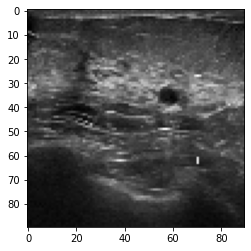

In [286]:
#filepath='G:/TRAINING_EXAMPLE/lp3.jpg'
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model("Vgg-compilation")
img=image.load_img('G:/TRAINING_EXAMPLE/breast_can4.png',target_size=(90,90))
plt.imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
print(np.floor(classes))

In [290]:
#report=input("Enter the report to be scanned: i.e \n 1.Lungs\n 2.Brain \n 3.Breast \n 4.Alziemers \n ")

In [294]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

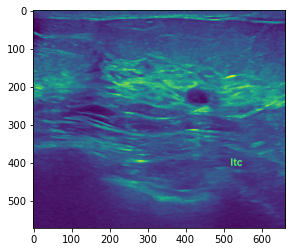

Cancer


In [295]:
if (classes[0][3]== 1.00):
    import cv2
    import tensorflow 
    CATEGORIES=["NORMAL","PNEUMONIA"]
    def prepare(filepath):
        img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
        #filtered=cv2.medianBlur(img_array,5)
        plt.imshow(img_array)
        plt.show()
        resized=cv2.resize(img_array,(90,90))
        return resized.reshape(-1,90,90,1)
    model=tf.keras.models.load_model("lungs-model")


    prediction = model.predict([prepare('G:/TRAINING_EXAMPLE/ln1.jpeg')])
    print(prediction)
    print(CATEGORIES[int(prediction[0][0])])

elif(classes[0][1]==1.00):
    CATEGORIES=["No","Yes"]
    def prepare(filepath):
        img_arr=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
        new_arr=cv2.resize(img_arr,(70,70))
        plt.imshow(img_arr)
        plt.show()
        return new_arr.reshape(-1,70,70,1)
    model=tf.keras.models.load_model('brain-model')

    prediction=model.predict([prepare("G:/TRAINING_EXAMPLE/n1_brain.jpg")])

    if(prediction.all()>0.75):
        print("Tumor chances of %",int(prediction*100))
    else:
        print("No Tumor")

elif(classes[0][2]==1.00):
    CATEGORIES=['Cancer','Normal']
    import cv2
    import tensorflow 
    CATEGORIES=["Cancer","Normal"]
    def prepare(filepath):
        img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
        #filtered=cv2.medianBlur(img_array,5)
        plt.imshow(img_array)
        plt.show()
        resized=cv2.resize(img_array,(90,90))
        return resized.reshape(-1,90,90,1)
    xception=tf.keras.models.load_model("breast_cancer-model")


    prediction = xception.predict([prepare("G:/TRAINING_EXAMPLE/breast_can4.png")])
    print(CATEGORIES[int(prediction[0][0])])
    
elif(classes[0][0]==1):
    import cv2
    import tensorflow 
    CATEGORIES=["Demented","NonDemented"]
    def prepare(filepath):
        img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
        resized=cv2.resize(img_array,(90,90))
        #filtered=cv2.medianBlur(img_array,5)
        plt.imshow(img_array)
        plt.show()
        return resized.reshape(-1,90,90,1)
    model=tf.keras.models.load_model("alziermers-model")


    prediction = model.predict([prepare("G:/TRAINING_EXAMPLE/al_2.jpg")])
    print(prediction)
    print(CATEGORIES[int(prediction[0][0])])
   

In [44]:
import pickle,gzip
import numpy as np
inp=input('Do you want to check your Heart Health ??')
if(inp=='Yes'or'YES'or'yes'):
    age= int(input("Enter the age: "))
    sex = int(input("Enter the sex ")) #sex - (1 = male; 0 = female)
    cp=int(input("Enter the chest pain type"))
    restbps = float(input("Enter the resting blood pressure: "))
    chol = float(input("Enter the Cholestrol in mg/dl: "))
    fbs = int(input("Enter the fasting blood pressure: ")) #fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    estecg = int(input("Enter the resting  electrocardiographic results: "))
    thalach=int(input("Enter the Max Heart Rate achieved: "))
    exang=int(input("Enter the exercise induced agina ")) #exercise induced angina (1 = yes; 0 = no)
    oldpeak=float(input("Enter the depression induced"))
    slope=int(input("Enter slope of peak seg"))
    ca=int(input("Enter no of major vessels"))#(0-3)
    thal=int(input("Enter the thal")) #3 = normal; 6 = fixed defect; 7 = reversable defect
    X_test1=np.array([age,sex,cp,restbps,chol,fbs,estecg,thalach,exang,oldpeak,slope,ca,thal]).reshape(1,-1)
    with open('model_decision','rb') as f:
        mp=pickle.load(f)
    

Do you want to check your Heart Health ??yes
Enter the age: 59
Enter the sex 1
Enter the chest pain type0
Enter the resting blood pressure: 170
Enter the Cholestrol in mg/dl: 326
Enter the fasting blood pressure: 0
Enter the resting  electrocardiographic results: 0
Enter the Max Heart Rate achieved: 140
Enter the exercise induced agina 1
Enter the depression induced3.4
Enter slope of peak seg0
Enter no of major vessels0
Enter the thal3


In [45]:
pred1=mp.predict(X_test1)
print(pred1)
if(pred1==0):
    print("You Have No Heart Disease")
else:
    print("You Have Maintain Your Heart Health")

[0]
You Have No Heart Disease
